In [1]:
from PySeirCampus.construct_SEIRPublicData import *
import pandas as pd
import copy
import math

In [2]:
distance_matrix_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/DistanceMatrix/distance_matrix1.csv"

In [3]:
distance_matrix_df = pd.read_csv(distance_matrix_file, header = None)
distance_matrix_df

0            1            2            3            4   \
0      0.000000   185.041823   671.058652  1085.271802  1485.058652   
1    205.025274     0.000000   204.974726   689.847112  1089.633962   
2    687.249424   207.132415     0.000000   207.080735   677.099615   
3   1096.228291   686.228161   199.917157     0.000000   199.869693   
4   1498.382924  1088.382794   674.169513   202.963087     0.000000   
5    203.975181   275.314971   685.314971  1099.528121  1499.314971   
6    289.207494   204.004983   289.214612   703.427762  1103.214612   
7    700.704476   290.704476   204.004981   290.711608   690.498458   
8   1109.823780   699.823780   285.610630   204.005046   285.617661   
9   1511.878409  1101.878409   687.665259   287.878409   204.032170   
10   683.307614   683.205865  1093.205865  1507.419015  1907.205865   
11   697.207507   697.214598   697.214598  1111.427748  1511.214598   
12  1108.704485   698.704485   698.704485   698.711593  1098.498443   
13  1517.823789  1107.823789   693.610639   693.610639   693.617627   
14  1919.993068  1509.993068  1095.779918   695.993068   695.993068   
15  1091.198624  1091.096794  1501.096794  1915.309944  2315.096794   
16  1105.207479  1105.214612  1105.214612  1519.427762  1919.214612   
17  1516.704492  1106.704492  1106.704492  1106.711646  1506.498496   
18  1925.823781  1515.823781  1101.610631  1101.610631  1101.617609   
19  2328.107713  1918.107713  1503.894563  1104.107713  1104.107713   
20  1498.978111  1498.905869  1908.905869  2323.119019  2722.905869   
21  1512.986818  1513.032685  1513.032685  1927.245835  2327.032685   
22  1924.369255  1514.369255  1514.369255  1514.416217  1914.203067   
23  2333.368960  1923.368960  1509.155810  1509.155810  1509.199339   
24  2735.656679  2325.656679  1911.443529  1511.656679  1511.656679   

             5            6            7            8            9   ...  \
0    184.149786   261.058652   671.058652  1085.271802  1485.058652  ...   
1    275.671554   184.280880   275.633962   689.847112  1089.633962  ...   
2    687.351359   277.351359   184.444948   277.312765   677.099615  ...   
3   1096.328195   686.328195   272.115045   184.606956   272.080176  ...   
4   1498.453545  1088.453545   674.240395   274.453545   184.745050  ...   
5      0.000000   184.912031   685.314971  1099.528121  1499.314971  ...   
6    204.994979     0.000000   205.005021   703.427762  1103.214612  ...   
7    700.697485   207.101569     0.000000   207.111581   690.498458  ...   
8   1109.816572   699.816572   199.888402     0.000000   199.898448  ...   
9   1511.878409  1101.878409   687.619662   203.088287     0.000000  ...   
10   203.975154   275.205865   685.205865  1099.419015  1499.205865  ...   
11   289.207507   204.004982   289.214598   703.427748  1103.214598  ...   
12   700.704485   290.704485   204.004977   290.711593   690.498443  ...   
13  1109.823789   699.823789   285.610639   204.005029   285.617627  ...   
14  1511.993068  1101.993068   687.779918   287.993068   204.032170  ...   
15   683.198494   683.096794  1093.096794  1507.309944  1907.096794  ...   
16   697.207479   697.214612   697.214612  1111.427762  1511.214612  ...   
17  1108.704492   698.704492   698.704492   698.711646  1098.498496  ...   
18  1517.823781  1107.823781   693.610631   693.610631   693.617609  ...   
19  1920.107713  1510.107713  1095.894563   696.107713   696.107713  ...   
20  1090.977982  1090.905869  1500.905869  1915.119019  2314.905869  ...   
21  1104.986818  1105.032685  1105.032685  1519.245835  1919.032685  ...   
22  1516.369255  1106.369255  1106.369255  1106.416217  1506.203067  ...   
23  1925.368960  1515.368960  1101.155810  1101.155810  1101.199339  ...   
24  2327.656679  1917.656679  1503.443529  1103.656679  1103.656679  ...   

             15           16           17           18           19  \
0   1076.982187  1077.058652  1487.058652  1901.271802  2301.058652   
1   1091.671554  1091.671554  1091.633962  1505

In [4]:
moving_speed = 2.0
F_df = distance_matrix_df

for index, row in F_df.iterrows():
    for column in range(len(row)):
        distance = row[column]
        if distance == 0:
            F_df.iloc[index,column] = 0
            continue
            
        time = distance/moving_speed
        F = pow(time, -3.993) * math.exp(-0.019 * time)      
        F_df.iloc[index,column] = F

F_df

0             1             2             3             4   \
0   0.000000e+00  2.428617e-09  1.399929e-13  4.013245e-16  2.571516e-18   
1   1.333746e-09  0.000000e+00  1.335701e-09  1.048825e-13  3.789152e-16   
2   1.091347e-13  1.255012e-09  0.000000e+00  1.256880e-09  1.275384e-13   
3   3.474338e-16  1.108550e-13  1.548463e-09  0.000000e+00  1.550631e-09   
4   2.186383e-18  3.852090e-16  1.334292e-13  1.416158e-09  0.000000e+00   
5   1.375024e-09  2.108038e-10  1.124171e-13  3.326943e-16  2.161735e-18   
6   1.517719e-10  1.373833e-09  1.517468e-10  8.528344e-14  3.169795e-16   
7   8.888472e-14  1.465758e-10  1.373833e-09  1.465515e-10  1.038435e-13   
8   2.906733e-16  9.008275e-14  1.650951e-10  1.373830e-09  1.650678e-10   
9   1.855657e-18  3.225862e-16  1.084422e-13  1.565535e-10  1.372747e-09   
10  1.159314e-13  1.161126e-13  3.615179e-16  1.958929e-18  1.716485e-20   
11  9.374132e-14  9.373120e-14  9.373120e-14  2.846316e-16  1.870673e-18   
12  2.949667e-16  9.162952e-14  9.162952e-14  9.161961e-14  3.372239e-16   
13  1.726483e-18  2.983902e-16  9.902401e-14  9.902401e-14  9.901345e-14   
14  1.480112e-20  1.898629e-18  3.494873e-16  9.549153e-14  9.549153e-14   
15  3.711917e-16  3.716894e-16  2.115394e-18  1.562612e-20  1.643113e-22   
16  3.088014e-16  3.087725e-16  3.087725e-16  1.693218e-18  1.493515e-20   
17  1.750086e-18  3.027998e-16  3.027998e-16  3.027714e-16  1.980961e-18   
18  1.383502e-20  1.768888e-18  3.237219e-16  3.237219e-16  3.236922e-16   
19  1.419935e-22  1.512783e-20  2.044651e-18  3.132876e-16  3.132876e-16   
20  2.170611e-18  2.172519e-18  1.682988e-20  1.501657e-22  1.785538e-24   
21  1.830854e-18  1.829835e-18  1.829835e-18  1.360920e-20  1.437158e-22   
22  1.406990e-20  1.800389e-18  1.800389e-18  1.799363e-18  1.582779e-20   
23  1.338588e-22  1.423377e-20  1.918034e-18  1.918034e-18  1.917020e-18   
24  1.552602e-24  1.459511e-22  1.634208e-20  1.860659e-18  1.860659e-18   

              5             6             7             8             9   ...  \
0   2.497005e-09  2.984712e-10  1.399929e-13  4.013245e-16  2.571516e-18  ...   
1   2.090079e-10  2.486820e-09  2.091964e-10  1.048825e-13  3.789152e-16  ...   
2   1.089646e-13  2.007693e-10  2.474140e-09  2.009545e-10  1.275384e-13  ...   
3   3.469779e-16  1.106853e-13  2.276954e-10  2.461690e-09  2.278874e-10  ...   
4   2.184505e-18  3.848503e-16  1.332834e-13  2.152122e-10  2.451133e-09  ...   
5   0.000000e+00  2.438435e-09  1.124171e-13  3.326943e-16  2.161735e-18  ...   
6   1.334917e-09  0.000000e+00  1.334529e-09  8.528344e-14  3.169795e-16  ...   
7   8.889417e-14  1.256126e-09  0.000000e+00  1.255765e-09  1.038435e-13  ...   
8   2.907008e-16  9.009263e-14  1.549776e-09  0.000000e+00  1.549317e-09  ...   
9   1.855657e-18  3.225862e-16  1.085179e-13  1.410996e-09  0.000000e+00  ...   
10  1.375025e-09  2.113567e-10  1.126052e-13  3.331713e-16  2.164606e-18  ...   
11  1.517719e-10  1.373833e-09  1.517468e-10  8.528346e-14  3.169796e-16  ...   
12  8.888471e-14  1.465758e-10  1.373833e-09  1.465515e-10  1.038435e-13  ...   
13  2.906733e-16  9.008274e-14  1.650950e-10  1.373831e-09  1.650679e-10  ...   
14  1.853075e-18  3.221011e-16  1.082521e-13  1.561346e-10  1.372747e-09  ...   
15  1.161257e-13  1.163071e-13  3.620369e-16  1.961527e-18  1.718657e-20  ...   
16  9.374136e-14  9.373118e-14  9.373118e-14  2.846315e-16  1.870673e-18  ...   
17  2.949667e-16  9.162951e-14  9.162951e-14  9.161954e-14  3.372237e-16  ...   
18  1.726483e-18  2.983903e-16  9.902402e-14  9.902402e-14  9.901348e-14  ...   
19  1.478148e-20  1.895987e-18  3.489610e-16  9.532487e-14  9.532487e-14  ...   
20  3.722710e-16  3.726245e-16  2.120311e-18  1.566072e-20  1.646638e-22  ...   
21  3.096963e-16  3.095100e-16  3.095100e-16  1.696958e-18  1.496664e-20  ...   
22  1.757219e-18  3.041334e-16  3.041334e-16  3.039462e-16  1.988085e-18  ...   
23  1.390804e-20  1.778678e-18  3.256602e-16  3.256602e-16  3.254742e-16  ...   
24  1.427136

In [5]:
#facility_allocation_file = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/GitHub/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/Grid_Uni_R_Rad_F_25.csv"
facility_allocation_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/Grid_Uni_R_Rad_F_25.csv"


In [6]:
total_population = 100000
total_job_count = 30000

In [7]:
df = generateJobStatusDataFrame(facility_allocation_file, total_job_count, "BlockGroup", 1)
facility_ratio_sum = sum(df.loc[:,"Normalized_Ratio"])
df

BLOCK_ID MEETING_TYPE  Normalized_Ratio  JOB_COUNT
0          0   Facilities          0.008835        265
1          1   Facilities          0.020673        620
2          2   Facilities          0.027402        822
3          3   Facilities          0.021450        644
4          4   Facilities          0.009627        289
5          5   Facilities          0.021834        655
6          6   Facilities          0.051403       1542
7          7   Facilities          0.075066       2252
8          8   Facilities          0.053789       1614
9          9   Facilities          0.023517        706
10        10   Facilities          0.028882        866
11        11   Facilities          0.074774       2243
12        12   Facilities          0.132904       3987
13        13   Facilities          0.079327       2380
14        14   Facilities          0.031154        935
15        15   Facilities          0.022545        676
16        16   Facilities          0.053457       1604
17        17   Facilities          0.079003       2370
18        18   Facilities          0.055995       1680
19        19   Facilities          0.024283        728
20        20   Facilities          0.010344        310
21        21   Facilities          0.024489        735
22        22   Facilities          0.032537        976
23        23   Facilities          0.025417        763
24        24   Facilities          0.011291        339

In [8]:
facility_ratio_sum

0.9999980000000002

In [9]:
meeting_type_id_count_dic = get_JOB_TYPE_ID_COUNT(df,1)
meeting_type_id_count_dic

{'Facilities': [{'BLOCK_ID': 0, 'Normalized_Ratio': 0.008835},
  {'BLOCK_ID': 1, 'Normalized_Ratio': 0.020673},
  {'BLOCK_ID': 2, 'Normalized_Ratio': 0.027402},
  {'BLOCK_ID': 3, 'Normalized_Ratio': 0.02145},
  {'BLOCK_ID': 4, 'Normalized_Ratio': 0.009627},
  {'BLOCK_ID': 5, 'Normalized_Ratio': 0.021834},
  {'BLOCK_ID': 6, 'Normalized_Ratio': 0.051403},
  {'BLOCK_ID': 7, 'Normalized_Ratio': 0.075066},
  {'BLOCK_ID': 8, 'Normalized_Ratio': 0.053789},
  {'BLOCK_ID': 9, 'Normalized_Ratio': 0.023517},
  {'BLOCK_ID': 10, 'Normalized_Ratio': 0.028882},
  {'BLOCK_ID': 11, 'Normalized_Ratio': 0.074774},
  {'BLOCK_ID': 12, 'Normalized_Ratio': 0.132904},
  {'BLOCK_ID': 13, 'Normalized_Ratio': 0.079327},
  {'BLOCK_ID': 14, 'Normalized_Ratio': 0.031154},
  {'BLOCK_ID': 15, 'Normalized_Ratio': 0.022545},
  {'BLOCK_ID': 16, 'Normalized_Ratio': 0.053457},
  {'BLOCK_ID': 17, 'Normalized_Ratio': 0.079003},
  {'BLOCK_ID': 18, 'Normalized_Ratio': 0.055995},
  {'BLOCK_ID': 19, 'Normalized_Ratio': 0.024283

In [10]:
block_ids = df.loc[:,"BLOCK_ID"]
block_population_ratio = [1/len(block_ids) for i in range(0, len(block_ids))]
block_population = [total_population/len(block_ids)for i in range(0, len(block_ids))]

population_data = {"BLOCK_ID":block_ids, "Normalized_Ratio":block_population_ratio,\
                   "POPULATION":block_population}
population_df = pd.DataFrame(population_data)
population_df

BLOCK_ID  Normalized_Ratio  POPULATION
0          0              0.04      4000.0
1          1              0.04      4000.0
2          2              0.04      4000.0
3          3              0.04      4000.0
4          4              0.04      4000.0
5          5              0.04      4000.0
6          6              0.04      4000.0
7          7              0.04      4000.0
8          8              0.04      4000.0
9          9              0.04      4000.0
10        10              0.04      4000.0
11        11              0.04      4000.0
12        12              0.04      4000.0
13        13              0.04      4000.0
14        14              0.04      4000.0
15        15              0.04      4000.0
16        16              0.04      4000.0
17        17              0.04      4000.0
18        18              0.04      4000.0
19        19              0.04      4000.0
20        20              0.04      4000.0
21        21              0.04      4000.0
22        22              0.04      4000.0
23        23              0.04      4000.0
24        24              0.04      4000.0

In [11]:
weight_df = F_df
for index, row in weight_df.iterrows():
    total_F = row.sum()
    block_population = population_df.loc[index, "POPULATION"]
    
    for column in range(len(row)):
        weight = block_population * weight_df.iloc[index, column]/total_F
        weight = round(weight,4)
        if weight > 0.5:
            weight_df.iloc[index,column] = weight
        else:
            weight_df.iloc[index,column] = 0
        
weight_df # indicate how many people will go from block i to block j (i.e from row i to column j)

0          1          2          3          4          5   \
0     0.0000  1859.3478     0.0000     0.0000     0.0000  1911.7057   
1   956.9426     0.0000   958.3454     0.0000     0.0000   149.9600   
2     0.0000   931.6107     0.0000   932.9974     0.0000     0.0000   
3     0.0000     0.0000  1029.3995     0.0000  1030.8407     0.0000   
4     0.0000     0.0000     0.0000  1387.3681     0.0000     0.0000   
5   980.6726   150.3461     0.0000     0.0000     0.0000     0.0000   
6   100.7592   912.0676   100.7425     0.0000     0.0000   886.2320   
7     0.0000   100.2723   939.8370   100.2557     0.0000     0.0000   
8     0.0000     0.0000   101.4704   844.3809   101.4536     0.0000   
9     0.0000     0.0000     0.0000   140.0032  1227.6255     0.0000   
10    0.0000     0.0000     0.0000     0.0000     0.0000   978.2854   
11    0.0000     0.0000     0.0000     0.0000     0.0000   100.7545   
12    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
13    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
14    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
15    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
16    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
17    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
18    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
19    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
20    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
21    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
22    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
23    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
24    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   

           6          7          8          9   ...         15         16  \
0    228.5094     0.0000     0.0000     0.0000  ...     0.0000     0.0000   
1   1784.2564   150.0953     0.0000     0.0000  ...     0.0000     0.0000   
2    149.0335  1836.5845   149.1710     0.0000  ...     0.0000     0.0000   
3      0.0000   151.3692  1636.5021   151.4968  ...     0.0000     0.0000   
4      0.0000     0.0000   210.8370  2401.3017  ...     0.0000     0.0000   
5   1739.1021     0.0000     0.0000     0.0000  ...     0.0000     0.0000   
6      0.0000   885.9742     0.0000     0.0000  ...     0.0000     0.0000   
7    859.3141     0.0000   859.0666     0.0000  ...     0.0000     0.0000   
8      0.0000   952.5200     0.0000   952.2380  ...     0.0000     0.0000   
9      0.0000     0.0000  1261.8309     0.0000  ...     0.0000     0.0000   
10   150.3734     0.0000     0.0000     0.0000  ...   976.8730   150.2405   
11   912.0251   100.7378     0.0000     0.0000  ...   100.7710   912.2894   
12   100.2675   939.7930   100.2510     0.0000  ...     0.0000   100.2838   
13     0.0000   101.4658   844.3428   101.4491  ...     0.0000     0.0000   
14     0.0000     0.0000   139.8574  1229.6371  ...     0.0000     0.0000   
15     0.0000     0.0000     0.0000     0.0000  ...     0.0000  1748.3583   
16     0.0000     0.0000     0.0000     0.0000  ...   886.2323     0.0000   
17     0.0000     0.0000     0.0000     0.0000  ...     0.0000   859.3145   
18     0.0000     0.0000     0.0000     0.0000  ...     0.0000     0.0000   
19     0.0000     0.0000     0.0000     0.0000  ...     0.0000     0.0000   
20     0.0000     0.0000     0.0000     0.0000  ...  1357.3177   209.3471   
21     0.0000     0.0000     0.0000     0.0000  ...   139.9541  1270.8667   
22     0.0000     0.0000     0.0000     0.0000  ...     0.0000   140.6959   
23     0.0000     0.0000     0.0000     0.0000  ...     0.0000     0.0000   
24     0.0000     0.0000     0.0000     0.0000  ...     0.0000     0.0000   

           17         18         19         20         21         22  \
0      0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
1      0.0000   

In [12]:
facility_allocation_df = df
x_df = weight_df
v_list= []

for name, value in x_df.iteritems():
    v = value.sum()
    v_list.append(v)

accessible_POI_job_count = []
for index, row in weight_df.iterrows():
    xs = []
    for column in range(len(row)):
        facility_count = facility_allocation_df.loc[column, "JOB_COUNT"]
        x = facility_count * weight_df.iloc[index, column] / v_list[column]
        xs.append(x)
    accessible_POI_job_count.append(round(sum(xs),2))

accessible_POI_job_count

[662.02,
 931.06,
 1215.68,
 993.07,
 678.37,
 950.89,
 1257.87,
 1782.25,
 1350.22,
 964.1,
 1227.31,
 1750.29,
 1890.31,
 1859.52,
 1178.68,
 1020.71,
 1352.72,
 1857.44,
 1440.92,
 1028.86,
 700.45,
 969.97,
 1179.87,
 1017.04,
 741.39]

In [30]:
def construct_roulette_from_accessible_POI_job_count(total_population,
                                                    accessible_POI_job_count):
    roulette = []
    sum_value = 0
    for value in accessible_POI_job_count:
        sum_value += value
        roulette.append(sum_value)
    roulette.append(total_population)
    return roulette

In [26]:
meeting_type_id_count_dic = get_JOB_TYPE_ID_COUNT(df,1)
Facilities_id_count = [{"MEETING_TYPE":"Facilities", "BLOCK_ID":item["BLOCK_ID"], "Normalized_Ratio":item["Normalized_Ratio"]} for item in meeting_type_id_count_dic["Facilities"]]
total_block_count = len(Facilities_id_count)

# get a list of next destinations
meeting_and_ratio = []
meeting_and_ratio.extend(copy.deepcopy(Facilities_id_count))

#meeting_and_ratio

In [31]:
# block_roulette = construct_roulette_from_normalized_ratio(meeting_and_ratio,
#                                                           total_job_count,
#                                                           total_population)

block_roulette = construct_roulette_from_accessible_POI_job_count(total_population,
                                                                 accessible_POI_job_count)

block_roulette

[662.0138380596071,
 1593.0585963718568,
 2808.7646540151827,
 3801.819067433371,
 4480.187024869963,
 5431.0654207857515,
 6688.884102945089,
 8471.162733097903,
 9821.32672170259,
 10785.427506500442,
 12012.763367148247,
 13763.067433121343,
 15653.490954496685,
 17513.01471856427,
 18691.729492921466,
 19712.422876893488,
 21065.089299468164,
 22922.5588335964,
 24363.412475125268,
 25392.267531379734,
 26092.715507614517,
 27062.676669671648,
 28242.582032091632,
 29259.602939949586,
 30001.0,
 100000]

In [15]:
# # No facilities, everyone just stay in one giant block

# total_population = 5000
# all_trips =[]
# iteration = 0
# residents_in_block = total_population
# for i in range(0, residents_in_block):
#     #in the scope of a people
            
#     route = [("HOME", 0)]
        
#     dic = {}
#     dic["Resident ID"] = iteration
#     dic["Route"] = route
#     all_trips.append(dic)
                        
#     iteration += 1

In [16]:
# # only have one giant block, and create trips in only one block

# total_population = 5000
# #total_job_count = total_population/3
# total_job_count = 5000
# a = np.random.binomial(1, total_job_count/total_population, total_population)

# all_trips =[]
# iteration = 0
# residents_in_block = total_population
# for i in range(0, residents_in_block):
#     #in the scope of a people
            
#     route = [("HOME", 0, 1)]
        
#     if a[i]==0:
#         # this means this resident will stay at home
#         route.append(("HOME", 0, 2))
#         route.append(("HOME", 0, 3))
        
#         dic = {}
#         dic["Resident ID"] = iteration
#         dic["Route"] = route
#         all_trips.append(dic)
#     else:
#         sampled_meeting_type = "Facilities"
#         route.append((sampled_meeting_type, 0, 2))
                    
#         route.append(("HOME", 0, 3))
#         dic = {}
#         dic["Resident ID"] = iteration
#         dic["Route"] = route
#         all_trips.append(dic)
                        
#     iteration += 1

In [32]:
def createRoute(resident_block_id, 
                total_population, 
                block_roulette, 
                trip_len):
    
    #in the scope of a people
    route = [("HOME", resident_block_id, 1)]
        
    for i in range(2,trip_len):
        # sample a number from the roulette wheel
        sampled_number = random.randrange(0, total_population)
        
        # Check which roulette part the sampled number is in.
        # The total number of roulette parts is equal to the number of blocks plus one
        if sampled_number >= block_roulette[len(block_roulette)-2]:
            # this means this resident will stay at home
            route.append(("HOME", resident_block_id, i))
        else:
            # this means we have to traverse through the roulette wheel
            # to find out which part the sampled number is in
            for k in range(0, len(block_roulette)):
                roulette_part_limit = block_roulette[k]
                if sampled_number <= roulette_part_limit:
                    sampled_meeting_type = "Facilities"
                    sampled_block_id = k
                    route.append((sampled_meeting_type, sampled_block_id, i))
                    break
                    
    route.append(("HOME", resident_block_id, trip_len))
    return route

In [33]:
%%time
# 5 destinations per person

dest_num = 5 # the count of destination per trip
all_trips =[]
iteration = 0
for i in range(0, total_block_count):
    #in the scope of a block

    # how many residents in the block
    # uniformly distributed residents
    residents_in_block = math.floor(total_population /  total_block_count)
    
    for j in range(0, residents_in_block):
        #in the scope of a people
            
        route = createRoute(i, total_population, block_roulette, dest_num)
        
        dic = {}
        dic["Resident ID"] = iteration
        dic["Route"] = route
        all_trips.append(dic)
        iteration += 1

CPU times: total: 719 ms
Wall time: 720 ms


In [34]:
all_trips

[{'Resident ID': 0,
  'Route': [('HOME', 0, 1),
   ('Facilities', 0, 2),
   ('HOME', 0, 3),
   ('HOME', 0, 4),
   ('HOME', 0, 5)]},
 {'Resident ID': 1,
  'Route': [('HOME', 0, 1),
   ('HOME', 0, 2),
   ('HOME', 0, 3),
   ('Facilities', 5, 4),
   ('HOME', 0, 5)]},
 {'Resident ID': 2,
  'Route': [('HOME', 0, 1),
   ('HOME', 0, 2),
   ('HOME', 0, 3),
   ('Facilities', 10, 4),
   ('HOME', 0, 5)]},
 {'Resident ID': 3,
  'Route': [('HOME', 0, 1),
   ('HOME', 0, 2),
   ('HOME', 0, 3),
   ('Facilities', 13, 4),
   ('HOME', 0, 5)]},
 {'Resident ID': 4,
  'Route': [('HOME', 0, 1),
   ('HOME', 0, 2),
   ('Facilities', 17, 3),
   ('Facilities', 0, 4),
   ('HOME', 0, 5)]},
 {'Resident ID': 5,
  'Route': [('HOME', 0, 1),
   ('HOME', 0, 2),
   ('HOME', 0, 3),
   ('Facilities', 14, 4),
   ('HOME', 0, 5)]},
 {'Resident ID': 6,
  'Route': [('HOME', 0, 1),
   ('HOME', 0, 2),
   ('Facilities', 6, 3),
   ('HOME', 0, 4),
   ('HOME', 0, 5)]},
 {'Resident ID': 7,
  'Route': [('HOME', 0, 1),
   ('Facilities', 

In [35]:
%%time

all_meeting_types = ["HOME", "Facilities"]
meetings = constructSEIR_PublicData(all_trips, 
                                    all_meeting_types,
                                    dest_num,
                                    meeting_duration = 5,
                                    start_date="9/2/2020", 
                                    end_date="11/13/2021")

CPU times: total: 18.1 s
Wall time: 18.1 s


In [36]:
meetings

[{'meeting': {'id': 'HOME 0.1',
   'info': {'name': 'HOME 0.1'},
   'meets': [('9/2/2020',
     '11/13/2021',
     ['M', 'T', 'W', 'R', 'F', 'S', 'U'],
     5)],
   'members': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    84,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    94,
    95,
    96,
    97,
    98,
    99,
    100,
    101,
    102,
    103,
 

In [38]:
meeting_names = []
s = 0
for meeting in meetings:
    ID = meeting["meeting"]["id"]
    if ".1" in ID: 
        s += len(meeting["meeting"]["members"])
    meeting_names.append(ID)
#len(meeting_names)
meeting_names

['HOME 0.1',
 'HOME 0.2',
 'HOME 0.3',
 'HOME 0.4',
 'HOME 0.5',
 'HOME 1.1',
 'HOME 1.2',
 'HOME 1.3',
 'HOME 1.4',
 'HOME 1.5',
 'HOME 2.1',
 'HOME 2.2',
 'HOME 2.3',
 'HOME 2.4',
 'HOME 2.5',
 'HOME 3.1',
 'HOME 3.2',
 'HOME 3.3',
 'HOME 3.4',
 'HOME 3.5',
 'HOME 4.1',
 'HOME 4.2',
 'HOME 4.3',
 'HOME 4.4',
 'HOME 4.5',
 'HOME 5.1',
 'HOME 5.2',
 'HOME 5.3',
 'HOME 5.4',
 'HOME 5.5',
 'HOME 6.1',
 'HOME 6.2',
 'HOME 6.3',
 'HOME 6.4',
 'HOME 6.5',
 'HOME 7.1',
 'HOME 7.2',
 'HOME 7.3',
 'HOME 7.4',
 'HOME 7.5',
 'HOME 8.1',
 'HOME 8.2',
 'HOME 8.3',
 'HOME 8.4',
 'HOME 8.5',
 'HOME 9.1',
 'HOME 9.2',
 'HOME 9.3',
 'HOME 9.4',
 'HOME 9.5',
 'HOME 10.1',
 'HOME 10.2',
 'HOME 10.3',
 'HOME 10.4',
 'HOME 10.5',
 'HOME 11.1',
 'HOME 11.2',
 'HOME 11.3',
 'HOME 11.4',
 'HOME 11.5',
 'HOME 12.1',
 'HOME 12.2',
 'HOME 12.3',
 'HOME 12.4',
 'HOME 12.5',
 'HOME 13.1',
 'HOME 13.2',
 'HOME 13.3',
 'HOME 13.4',
 'HOME 13.5',
 'HOME 14.1',
 'HOME 14.2',
 'HOME 14.3',
 'HOME 14.4',
 'HOME 14.5',


In [39]:
# output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/"+\
# "Documents/Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events"

output_folder_path = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/Events"

##########################Write data into a .data file#######################
output_file = output_folder_path + "/" + "meetings" + str(0) + ".data"

# isExist = os.path.exists(output_file)
# if isExist:
#     for j in range(0, 99999999):
#         localName = output_folder_path + "/" + "meetings" + str(j) + ".data"
#         if localName == output_file:
#             continue
            
#         if os.path.exists(localName)==False:
#             output_file = localName
#             break
            
    
o_file = open(output_file,"w")

student_lst = createStudentList(total_population)
for student in student_lst:
    o_file.write(str(student)+"\n")


for meeting in meetings:
    members = meeting["meeting"]["members"]
    o_file.write(str(meeting)+"\n")    

    
o_file.close()

In [43]:
from datetime import datetime, timedelta
from PySeirCampus import *
import os
import re
import seaborn as sb

In [44]:
holiday_list = [(2020, 10, 14)]
holidays = set(datetime(*h) for h in holiday_list)
#semester = Semester('publicdata.data', holidays)

In [45]:
# generated_meetings_folder = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events"

# generated_meetings_folder = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
#                             "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events"+\
#                             "/5kMeal_1kHousing_2kRecrea_3kOffice_2kOther"

generated_meetings_folder = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/Events"

meeting_files = os.listdir(generated_meetings_folder) 

#Filtering only the data files.
meetings_files = [generated_meetings_folder + "/" + f for f in meeting_files if f.endswith(".data")] 
meetings_files

['C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/Events/meetings0.data']

In [46]:
semester = Semester(meetings_files[0], holidays)

parameters = Parameters(reps = 5)
parameters.initial_exposure = 1

rate_multiplier = 0
parameters.rate *= (1 + rate_multiplier) # the unit of rate is per minute
#1/(65.6*60*7)

parameters.infection_duration = BasicInfectionDuration(rate_contagious=1/3.5, 
                                                       rate_recovery=1/5)

parameters.start_date = datetime(2020,9,2)
parameters.end_date = datetime(2021,1,13)

parameters.info()

verbose = False
rate = 4e-05
daily_spontaneous_prob = 0
contact_tracing = DefaultContactTracing(no action)
intervention_policy = DefaultInterventionPolicy(no intervention)
infection_duration = <PySeirCampus.BasicInfectionDuration object at 0x0000026C7FA79A30>
quarantine_length = 14
preclass_interaction_time = 0
initial_exposure = 1
preprocess = <function Parameters.__init__.<locals>.<lambda> at 0x0000026C0B0811F0>
repetitions = 5
start_date = 2020-09-02 00:00:00
end_date = 2021-01-13 00:00:00
vaccine_benefit_self = 0.9
vaccine_benefit_others = 0.5


Semester object with 100000 students, 200 courses, and 0 groups.
Course sizes: min 643 , avg 2500.0 , max 4000
Course durations: min 5.0 , avg 5.0 , max 5.0


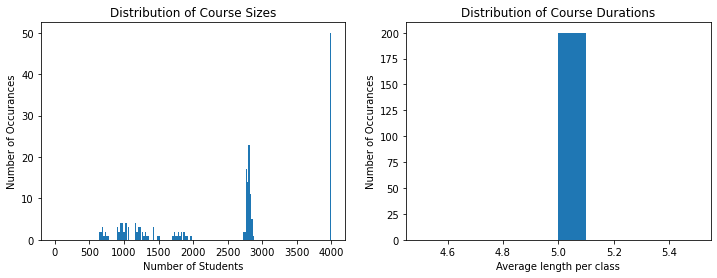

In [47]:
semester.summarize()

Running 5 repetitions.
Initial exposed: 1
Average final exposure count is 99999.6
Sample Standard deviation is: 0.8944271909999159
Quarantine: max 0.0 , avg 0.0


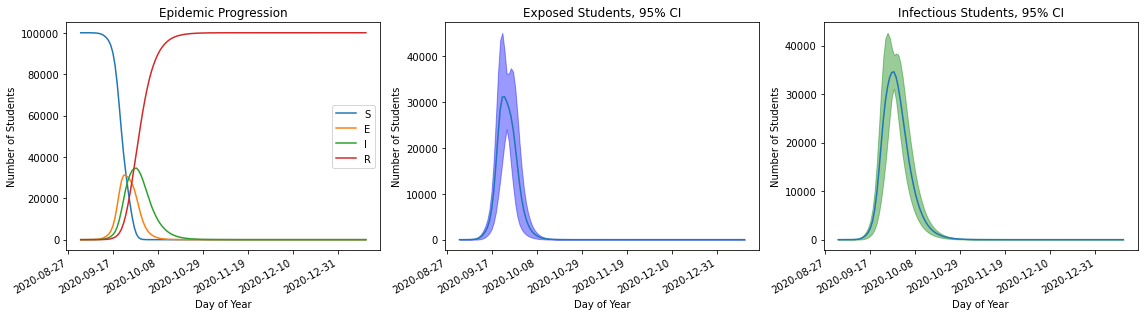

In [49]:
run_repetitions(semester, parameters)

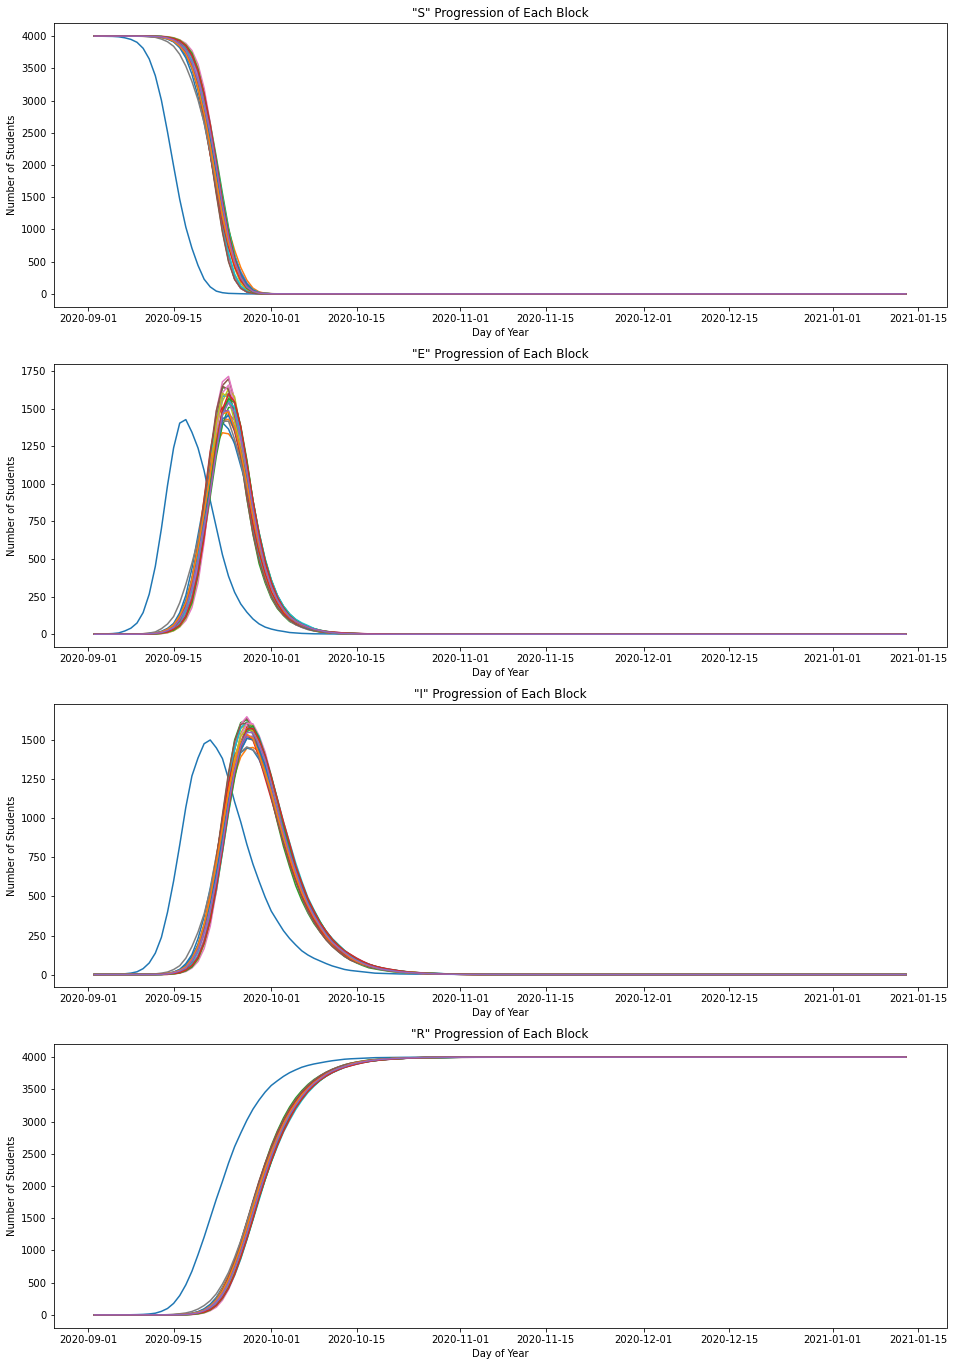

In [50]:
# initial_exposed_students is a list that contains students' id number
initial_exposed_students = [0]
stats_dic = run_and_specify_ini_exp_students(semester, parameters,
                                            initial_exposed_students)

In [504]:
Ss = {} 
Es = {}
Is = {}
Rs = {}

for block, stats in stats_dic["S_blocks_stats"].items():
        Ss[block] = np.mean(stats,axis=0).tolist()
for block, stats in stats_dic["E_blocks_stats"].items():
        Es[block] = np.mean(stats,axis=0).tolist()
for block, stats in stats_dic["I_blocks_stats"].items():
        Is[block] = np.mean(stats,axis=0).tolist()
for block, stats in stats_dic["R_blocks_stats"].items():
        Rs[block] = np.mean(stats,axis=0).tolist()

stats_dic = {"Ss":Ss, "Es":Es, "Is":Is, "Rs":Rs}

In [505]:
S_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
                        "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/S"
E_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
                        "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/E"
I_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
                        "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/I"
R_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
                        "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/R"

S_output_file = S_output_folder_path + ".data"
E_output_file = E_output_folder_path + ".data"
I_output_file = I_output_folder_path + ".data"
R_output_file = R_output_folder_path + ".data"


for name, stats in stats_dic.items():
    file = None
    
    if name == "Ss":
        file = S_output_file
    elif name == "Es":
        file = E_output_file
    elif name == "Is":
        file = I_output_file
    elif name == "Rs":
        file = R_output_file
    else:
        raise Exception("There is a typo. file name should choose from ['S','E','I','R']")

        
    o_file = open(file,"w")## choose which file to write

    for key,value in stats.items():
        o_file.write(str(key)+":"+str(value)+"\n") 

    o_file.close()